In [9]:
import pathlib
project_path = pathlib.Path().resolve().parent.parent
paths = []

import sys
path = project_path.joinpath("benchmark/third_party/bench-mr/python").as_posix()
if path not in sys.path:
    sys.path.append(path)

import os
os.environ["MPB_BINARY"] = "./benchmark"
os.environ["MPB_PYTHON_BINARY"] = "../../../../scripts/run_bench_mr.py"
os.environ["MPB_BINARY_DIR"] = "/home/mikhail/research/pytorch-motion-planner/benchmark/third_party/bench-mr/bin"
os.environ["PYTHONPATH"] = "../../../../build/benchmark:" + project_path.as_posix()


import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats

%config InlineBackend.figure_format='retina'

In [10]:
len("constrained_onf_planner")

23

# Run one experiment

In [35]:
m = MPB()
m.set_corridor_grid_env(100, 100, branches=100, radius=3, seed=3)
with open("/home/mikhail/tmp.id", "w") as fd:
    fd.write(str(0))
m["max_planning_time"] = 60
m["benchmark.planning"]['constrained_onf_planner1'] = True
m["benchmark.planning"]['constrained_onf_planner2'] = True
m["benchmark.planning"]['constrained_onf_planner3'] = True
m["benchmark.planning"]['constrained_onf_planner4'] = True
m["benchmark.planning"]['constrained_onf_planner5'] = True
# m["benchmark.planning"]['constrained_onf_planner2'] = True
m.set_planners([
    'constrained_onf_planner1', 
    'constrained_onf_planner2',
    'constrained_onf_planner3', 
    'constrained_onf_planner4',
    'constrained_onf_planner5', 
])
m.run(id=f"corridor", runs=1)

Running MPB with ID corridor (log file at corridor.log)...


corridor:   0%|          | 0/5 [00:00<?, ?it/s]

0

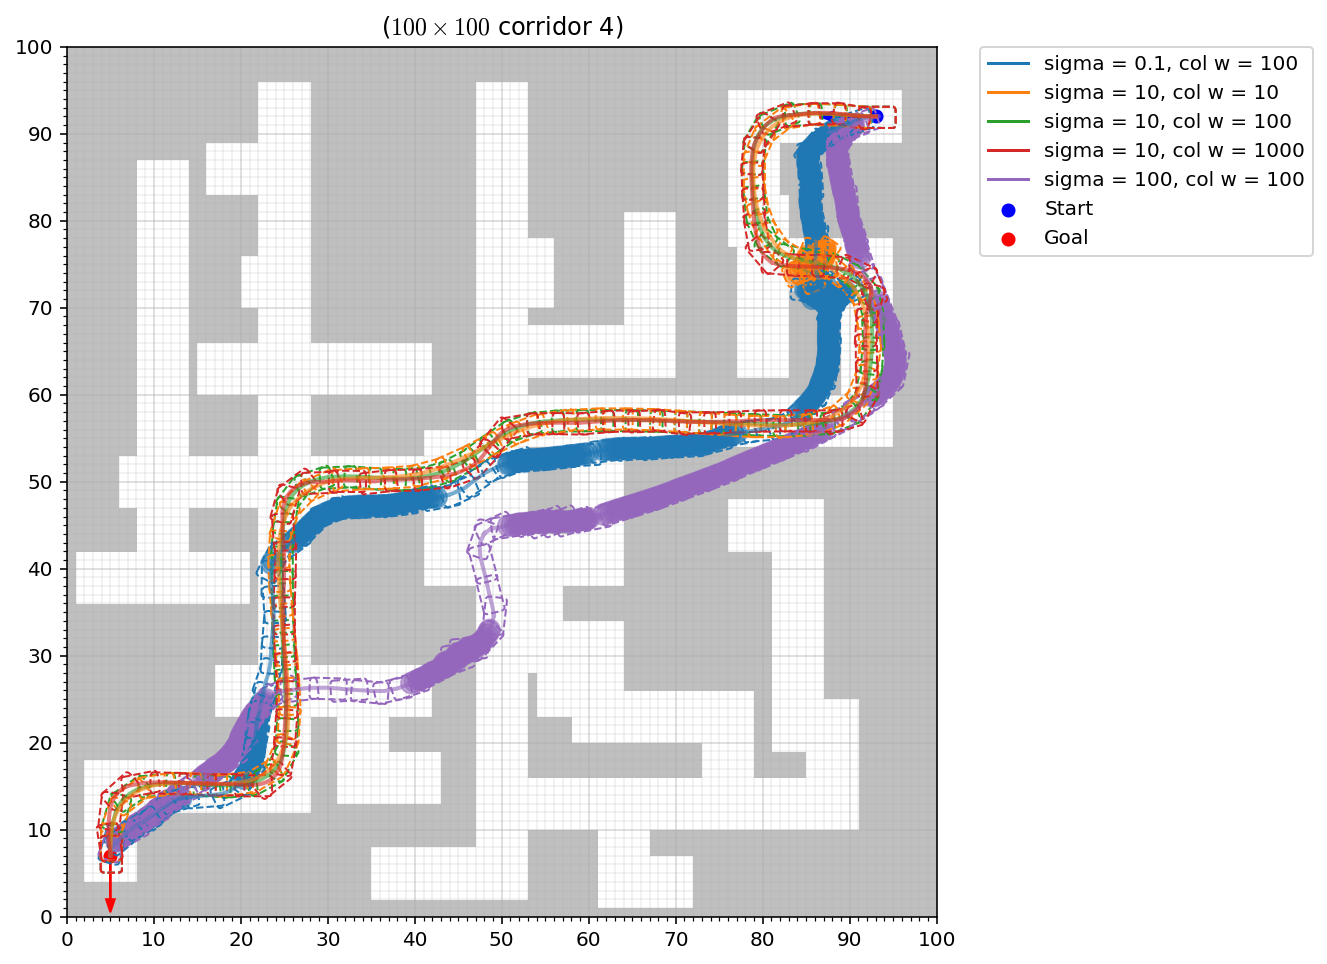

In [36]:
m.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/corridor_experiment.pdf",
                         num_colors=10)

Visualizing corridor_results.json...


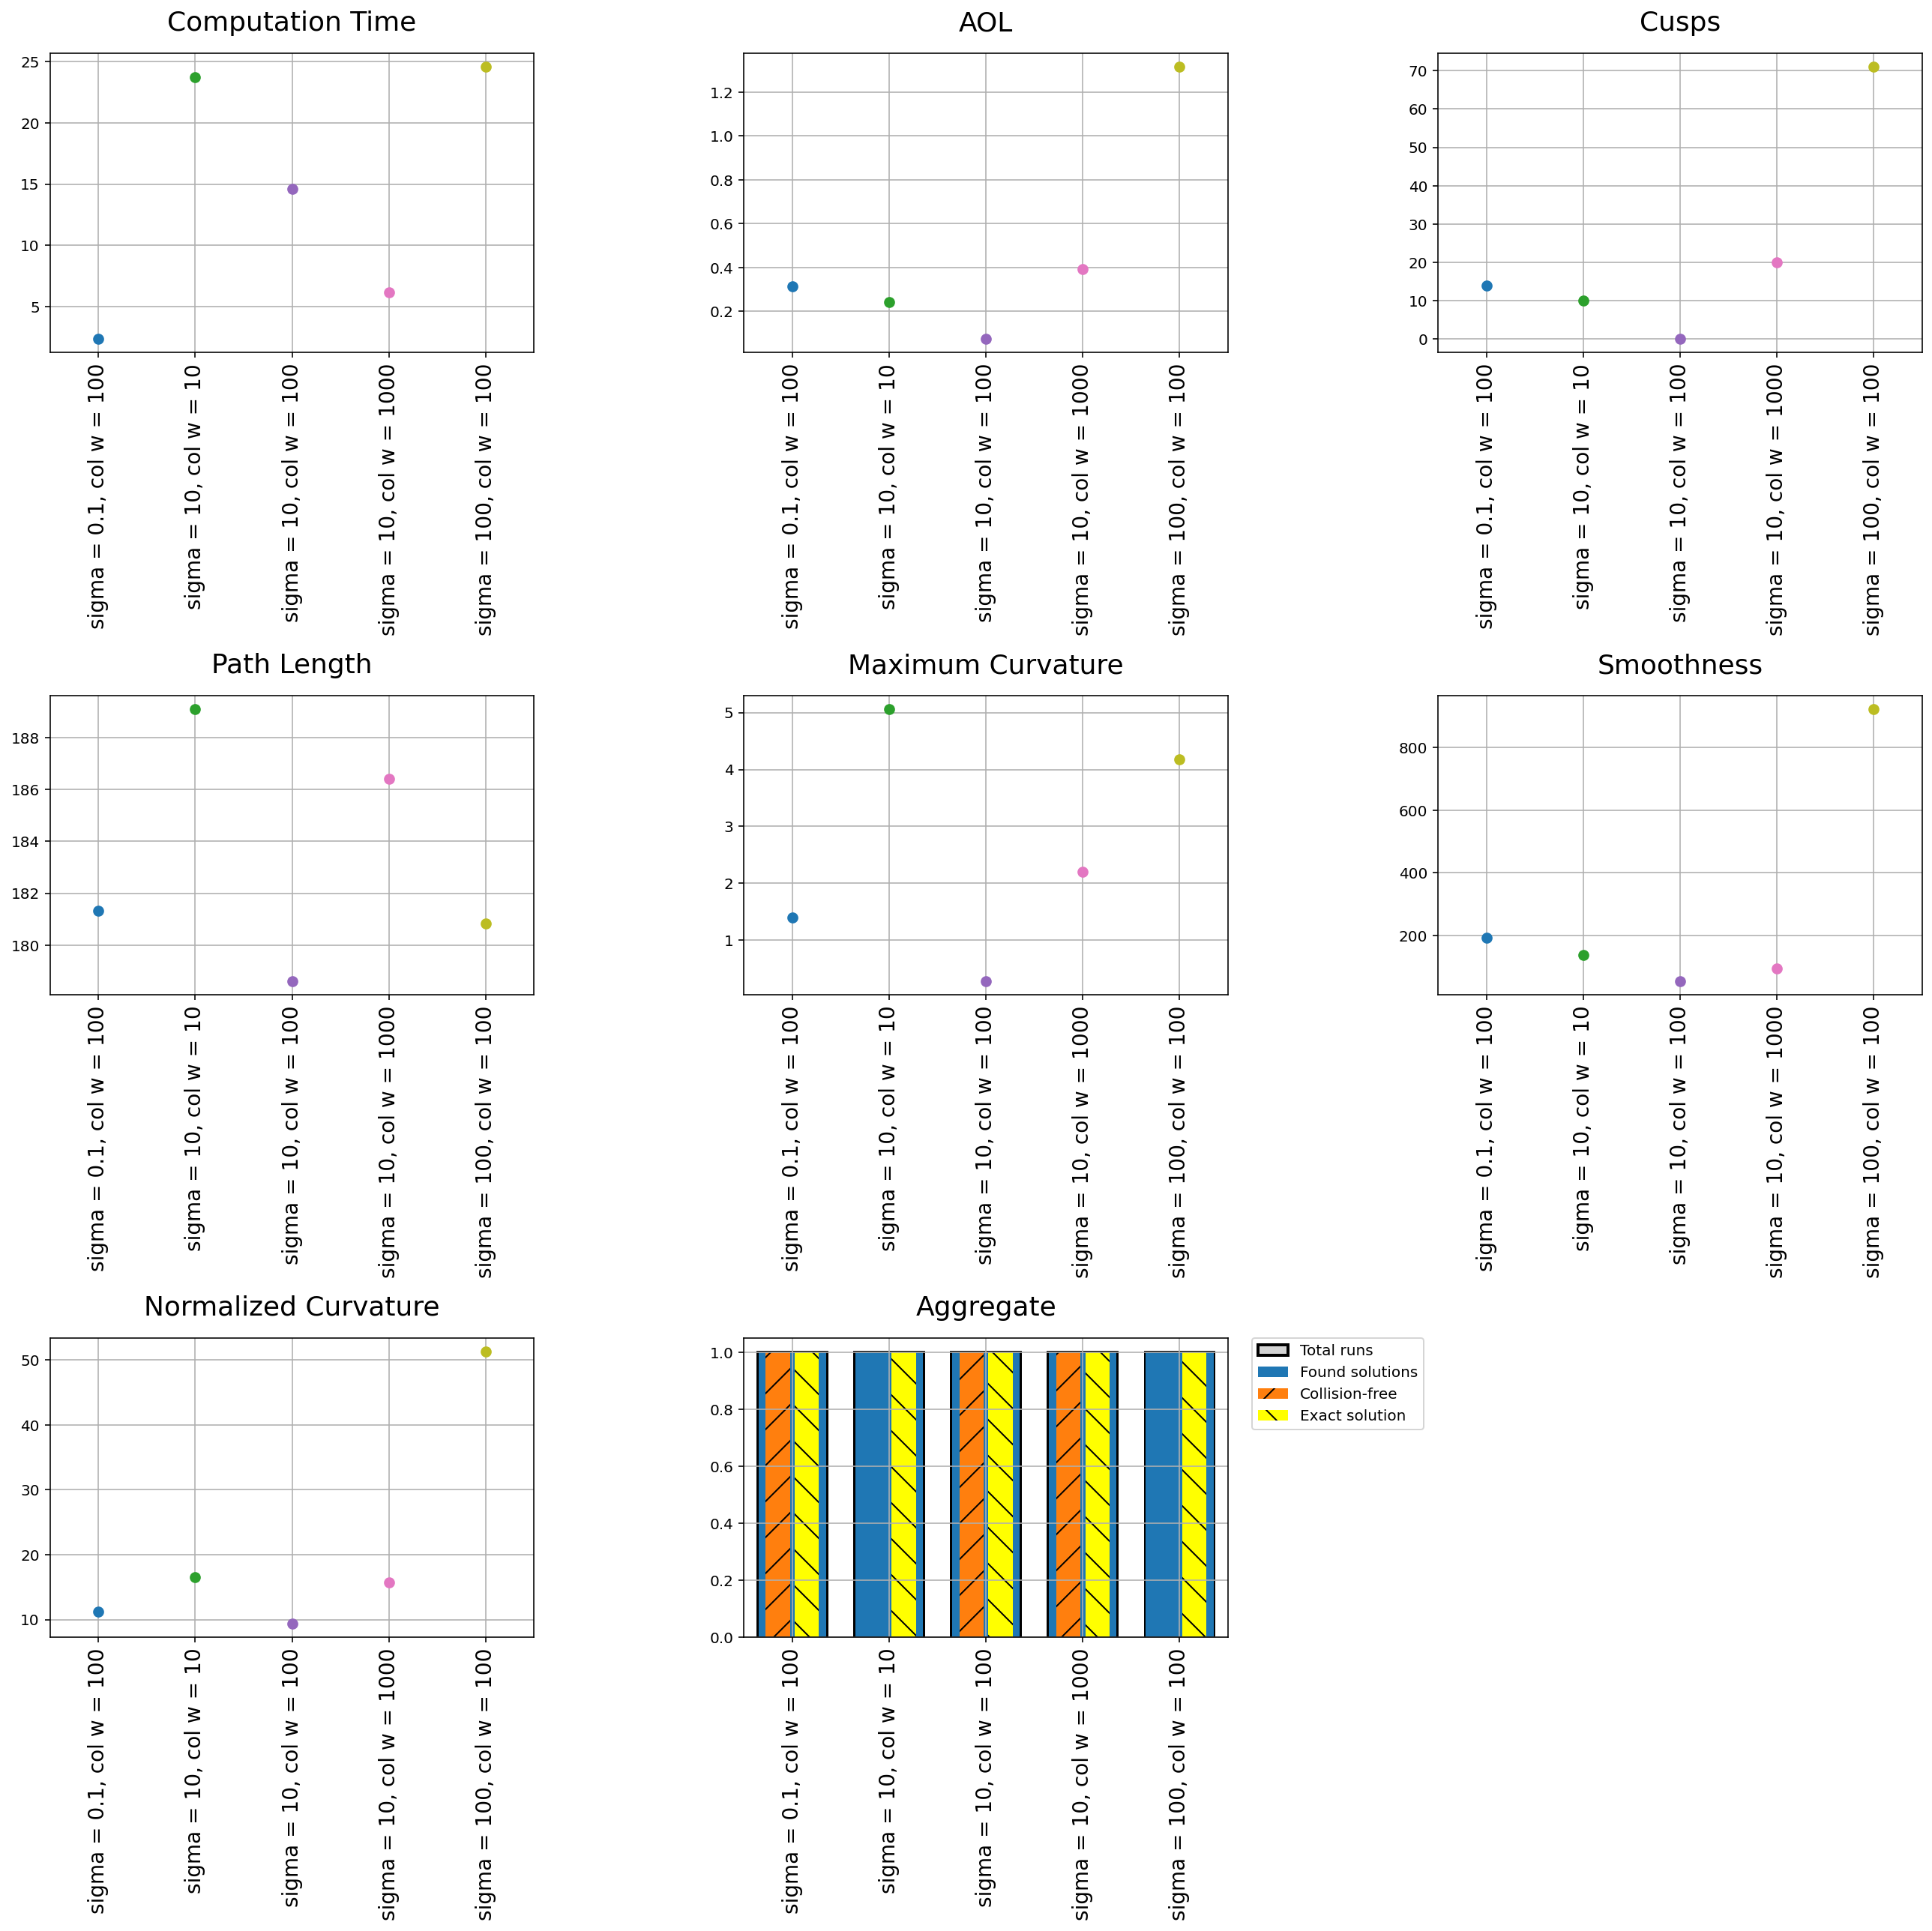

In [34]:
m.plot_planner_stats(metrics="planning_time, aol, cusps, path_length, max_curvature, smoothness, normalized_curvature, aggregate")

# Run pool

Available memory: 12.86 GB, limiting each MPB process to 41.7% usage (5.36 GB).
Creating pool of 1 processes.
Running MPB with ID corridor_0 (log file at corridor/corridor_0.log)...


corridor_0:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 0 (corridor_0) finished successfully.
Running MPB with ID corridor_1 (log file at corridor/corridor_1.log)...


corridor_1:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 1 (corridor_1) finished successfully.
Running MPB with ID corridor_2 (log file at corridor/corridor_2.log)...


corridor_2:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 2 (corridor_2) finished successfully.
Running MPB with ID corridor_3 (log file at corridor/corridor_3.log)...


corridor_3:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 3 (corridor_3) finished successfully.
Running MPB with ID corridor_4 (log file at corridor/corridor_4.log)...


corridor_4:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 4 (corridor_4) finished successfully.
Running MPB with ID corridor_5 (log file at corridor/corridor_5.log)...


corridor_5:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 5 (corridor_5) finished successfully.
Running MPB with ID corridor_6 (log file at corridor/corridor_6.log)...


corridor_6:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 6 (corridor_6) finished successfully.
Running MPB with ID corridor_7 (log file at corridor/corridor_7.log)...


corridor_7:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 7 (corridor_7) finished successfully.
Running MPB with ID corridor_8 (log file at corridor/corridor_8.log)...


corridor_8:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 8 (corridor_8) finished successfully.
Running MPB with ID corridor_9 (log file at corridor/corridor_9.log)...


corridor_9:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 9 (corridor_9) finished successfully.
All benchmarks succeeded.


True

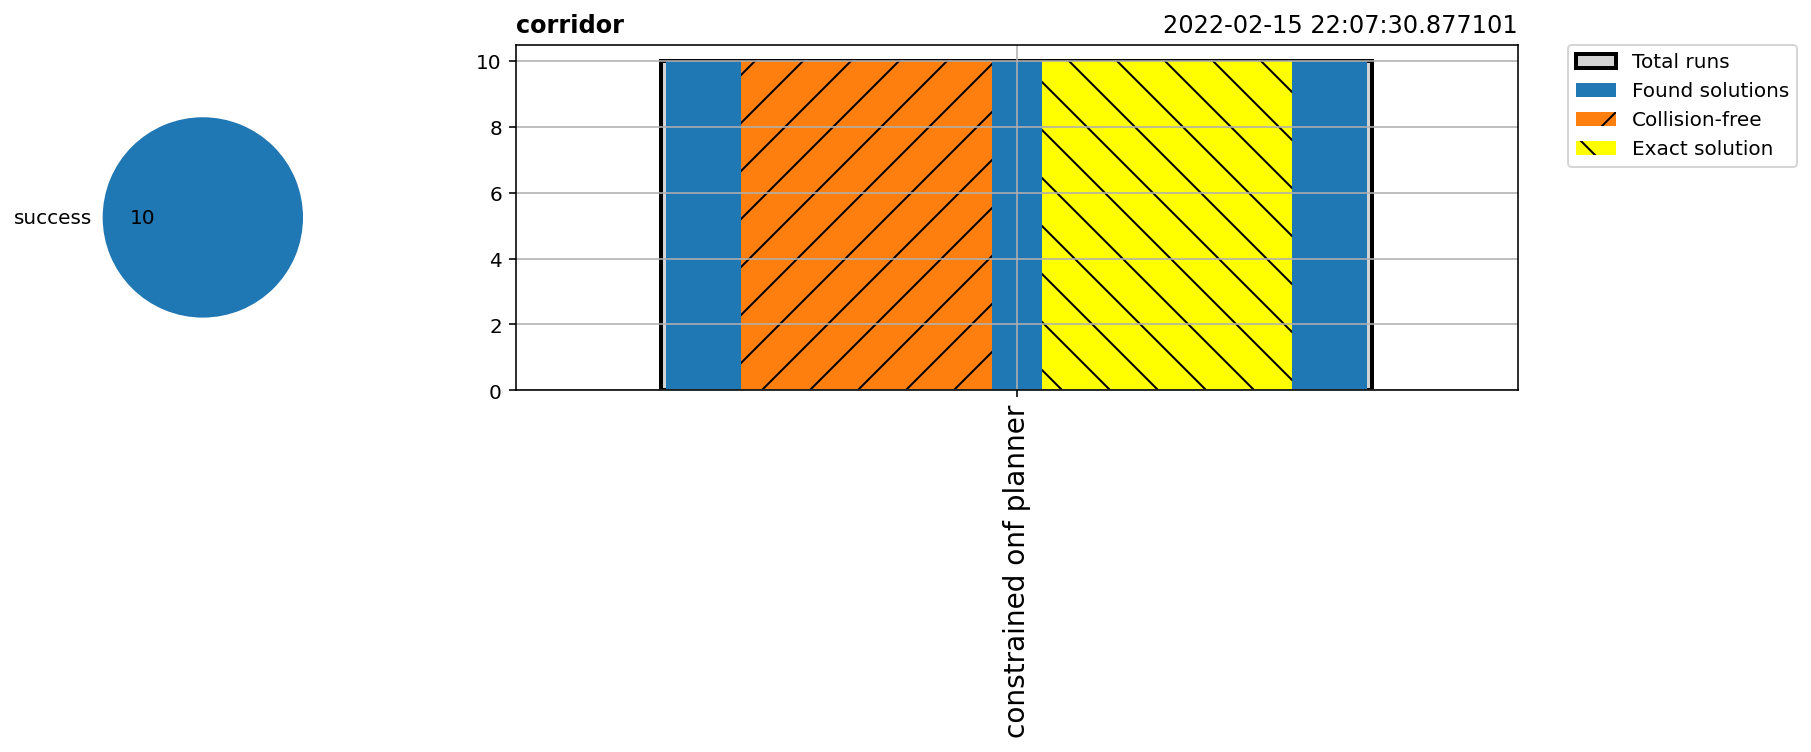

In [11]:
env = os.environ
env["MPLBACKEND"] = "TkAgg"
pool = MultipleMPB()
for i in range(10):
    m = MPB()
    m.set_corridor_grid_env(100, 100, branches=100, radius=3, seed=i + 2)
    m["max_planning_time"] = 60
    m["benchmark.planning"]['constrained_onf_planner'] = True
    m.set_planners(['constrained_onf_planner'])
    pool.benchmarks.append(m)

pool.run_parallel(id="corridor", runs=1, processes=1)

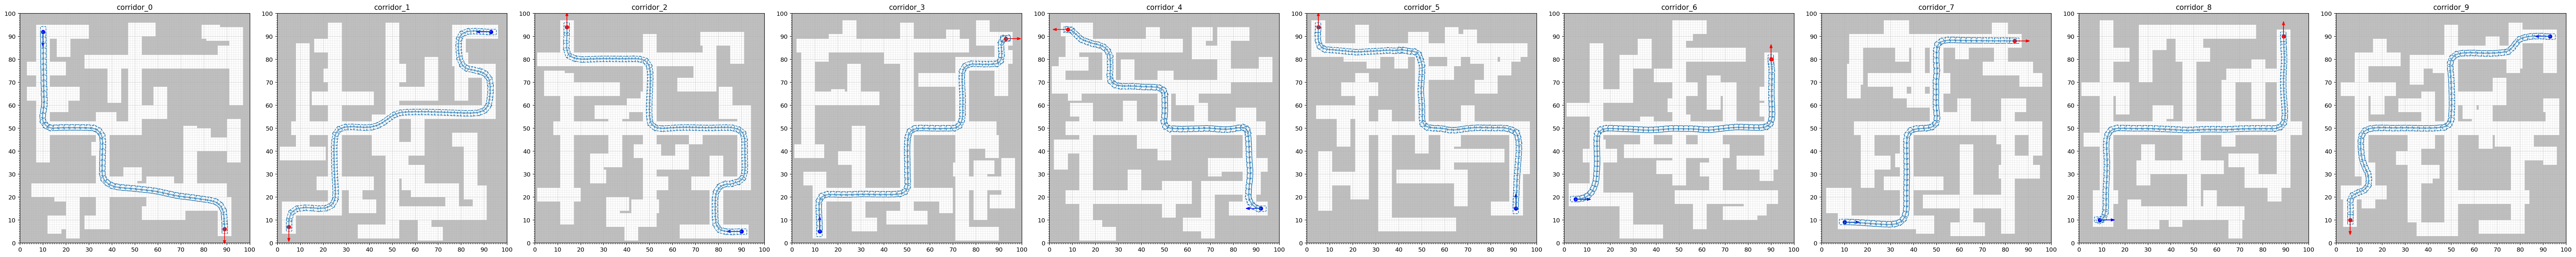

In [13]:
pool.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/corridor_experiment_pool.pdf",
                         num_colors=10)

Successfully merged [corridor/corridor_0_results.json, corridor/corridor_1_results.json, corridor/corridor_2_results.json, corridor/corridor_3_results.json, corridor/corridor_4_results.json, corridor/corridor_5_results.json, corridor/corridor_6_results.json, corridor/corridor_7_results.json, corridor/corridor_8_results.json, corridor/corridor_9_results.json] into corridors_result.json.
Visualizing corridors_result.json...


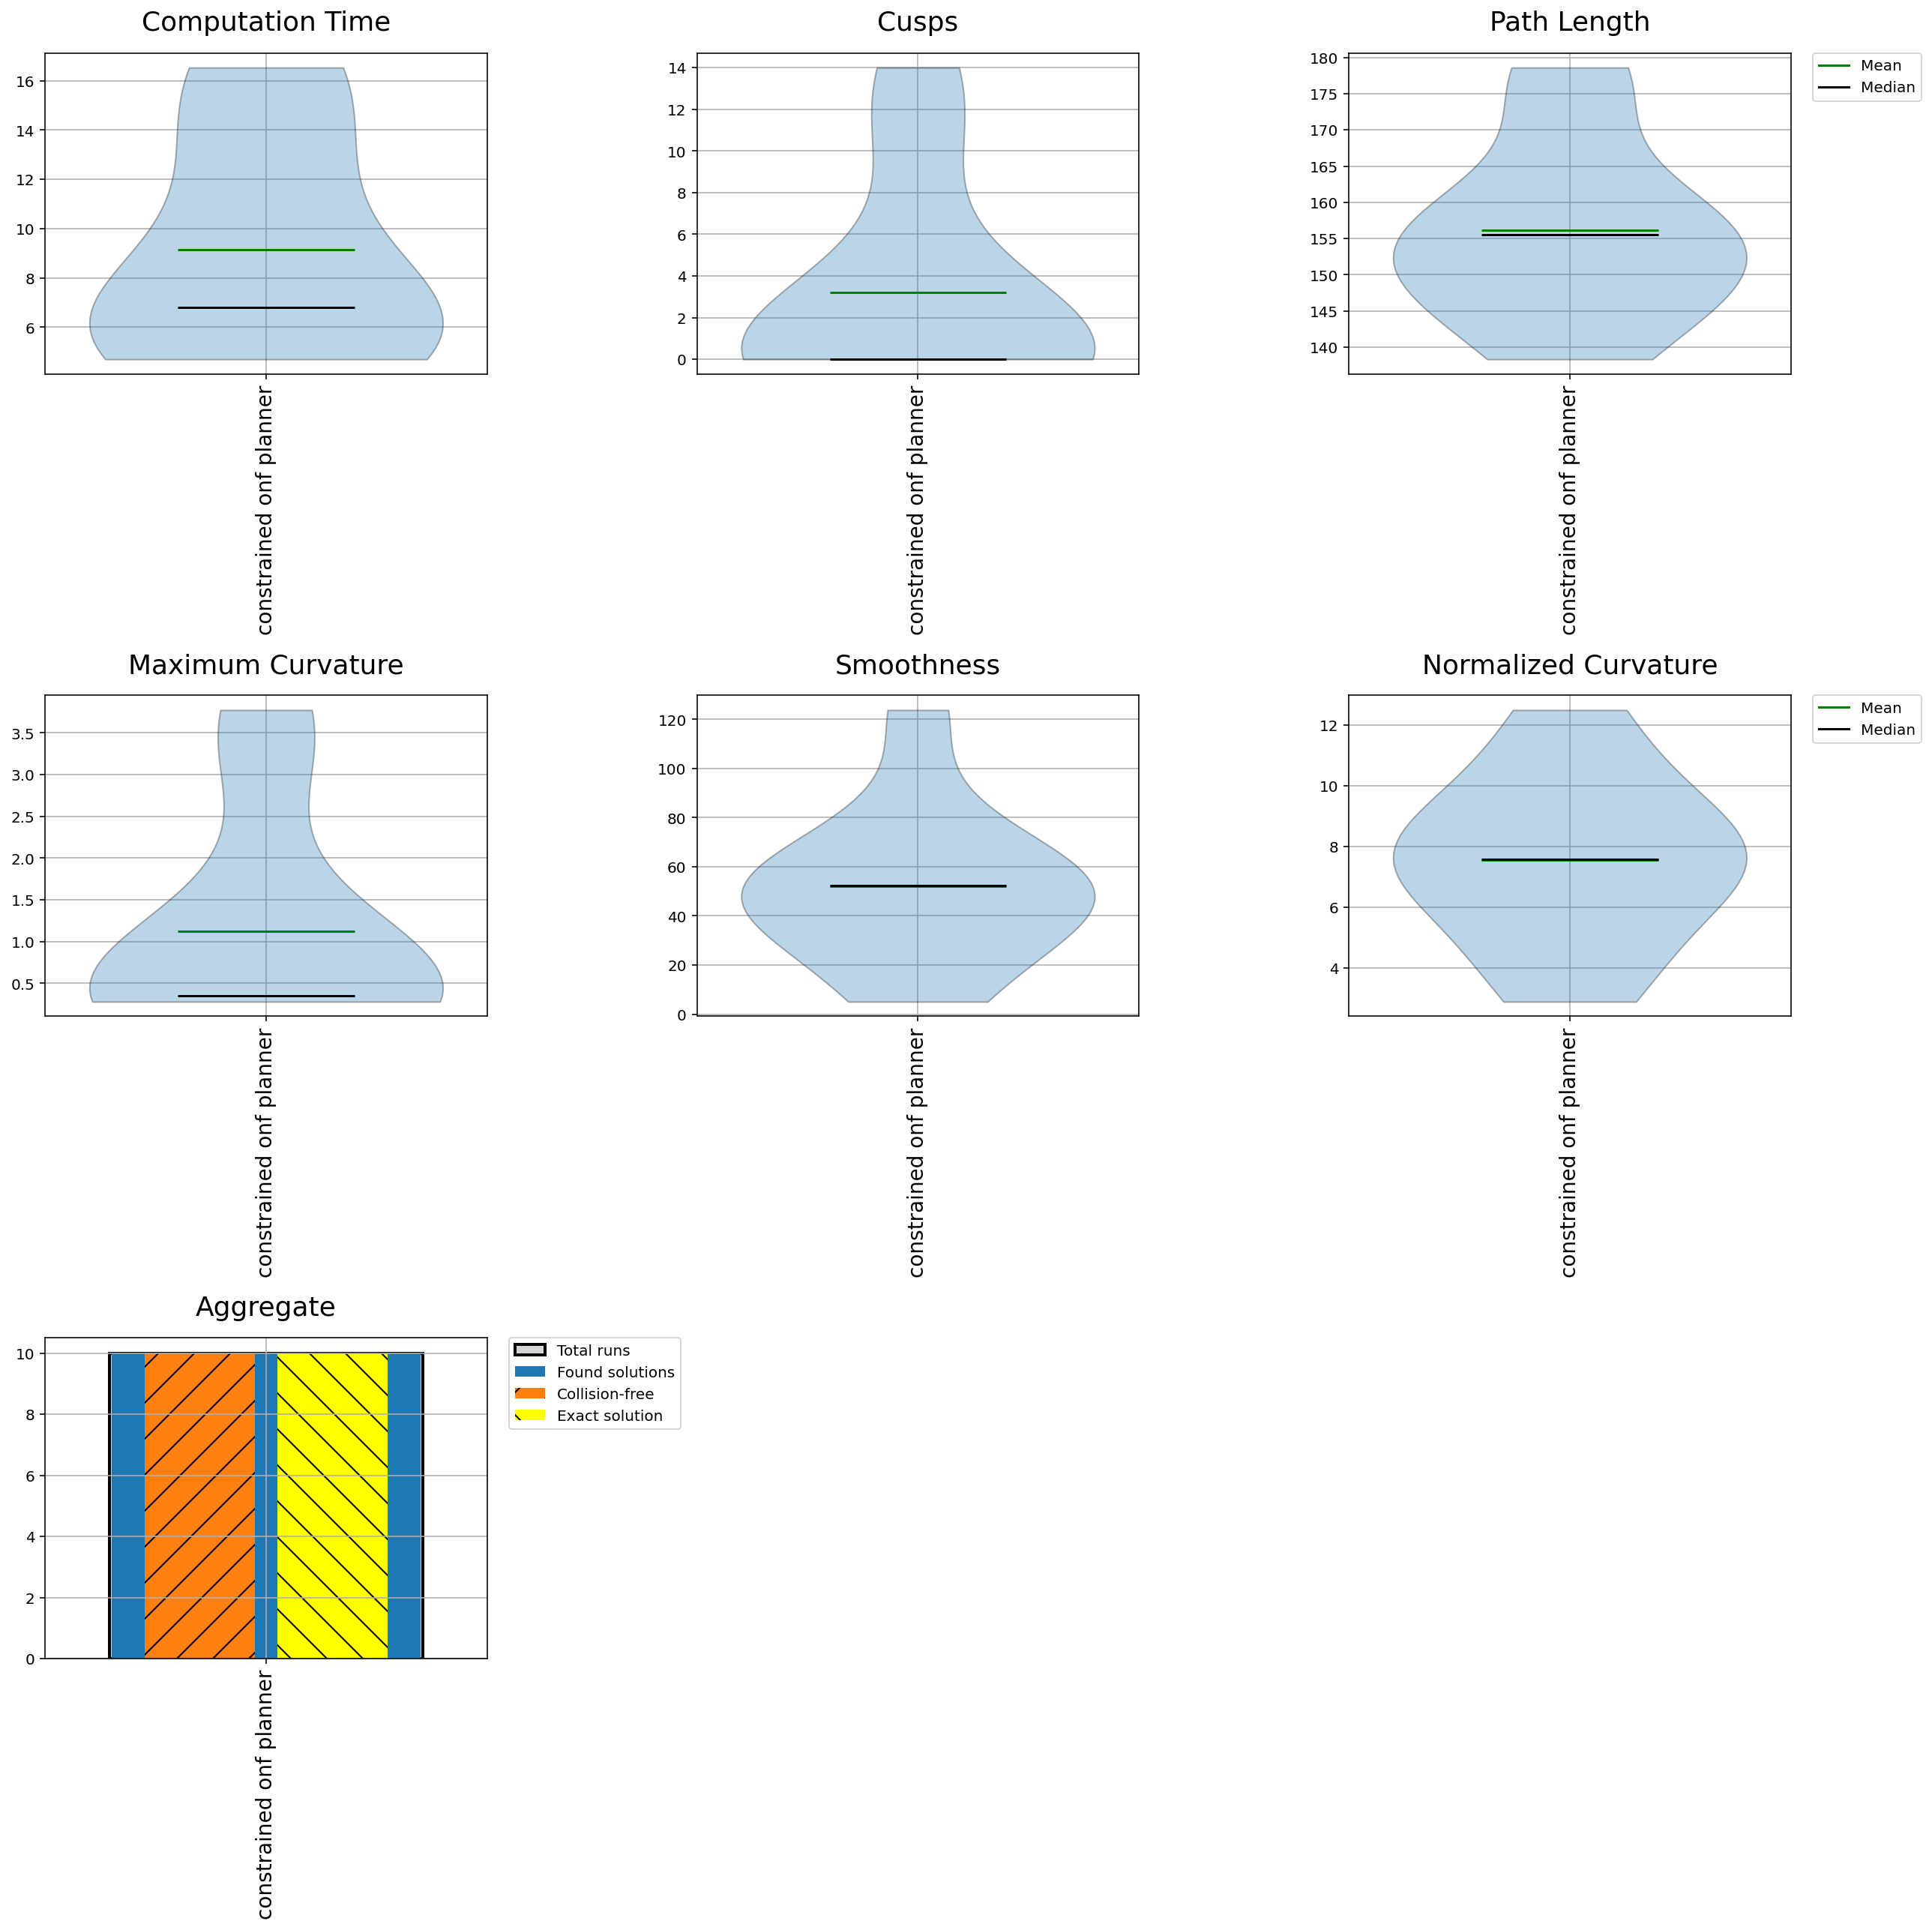

In [12]:
result = "corridors_result.json"
pool.merge(result, make_separate_runs=True)
plot_planner_stats(result, metrics="planning_time, cusps, path_length, max_curvature, smoothness, normalized_curvature, aggregate")

In [7]:
# data = json.load(open(m.results_filename, "r"))
# data["runs"][0]["plans"]['constrained_onf_planner']['stats']